### Hierarchical Clustering

In [2]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [3]:
f = pd.read_pickle('f.pkl')
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 25 columns):
town         565 non-null object
county       565 non-null object
state        565 non-null object
FIPS         565 non-null object
city_town    565 non-null object
0            565 non-null float64
1            565 non-null float64
2            565 non-null float64
3            565 non-null float64
4            565 non-null float64
5            565 non-null float64
6            565 non-null float64
7            565 non-null float64
8            565 non-null float64
9            565 non-null float64
10           565 non-null float64
11           565 non-null float64
12           565 non-null float64
13           565 non-null float64
14           565 non-null float64
15           565 non-null float64
16           565 non-null float64
17           565 non-null float64
18           565 non-null float64
19           565 non-null float64
dtypes: float64(20), object(5)
memory usage: 114.8

In [4]:
X = f.iloc[:,5:]
X=X.set_index(f['town'])
#X.ix[520]

In [5]:
X_scaled = preprocessing.scale(X)

X_scaled[20:21,:]    

array([[ 0.15262, -0.48111,  0.97954,  0.49871, -0.70155, -0.51379,
        -0.44663, -0.36454, -0.77318,  0.0331 ,  0.08936, -0.21116,
         0.10222, -0.60435, -1.24425,  0.69594,  0.31316, -1.01458,
         1.40212,  0.34075]])

In [6]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for m in methods:
    Z = linkage(X_scaled, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print(m,": ", c)

#    c, coph_dists = cophenet(Z, pdist(X))
#c
#coph_dists
#c

single :  0.83717461427
complete :  0.631795022144
average :  0.866898740676
weighted :  0.579792577208
centroid :  0.866805117198
median :  0.839170750539
ward :  0.338655360073


In [7]:
Z = linkage(X_scaled, 'weighted')

Z[:10]

Z[-10:]

In [31]:
Z = linkage(X_scaled, 'ward')

Z[:10]

Z[-10:]

array([[ 1101.     ,  1110.     ,    23.35994,    70.     ],
       [  161.     ,  1104.     ,    25.14056,    32.     ],
       [  520.     ,  1120.     ,    26.71228,    33.     ],
       [ 1108.     ,  1117.     ,    26.89063,   177.     ],
       [ 1114.     ,  1118.     ,    31.10913,   257.     ],
       [ 1119.     ,  1123.     ,    32.86974,   327.     ],
       [  542.     ,  1115.     ,    34.09621,    28.     ],
       [ 1121.     ,  1122.     ,    38.36222,   210.     ],
       [ 1125.     ,  1126.     ,    42.897  ,   238.     ],
       [ 1124.     ,  1127.     ,    55.9042 ,   565.     ]])

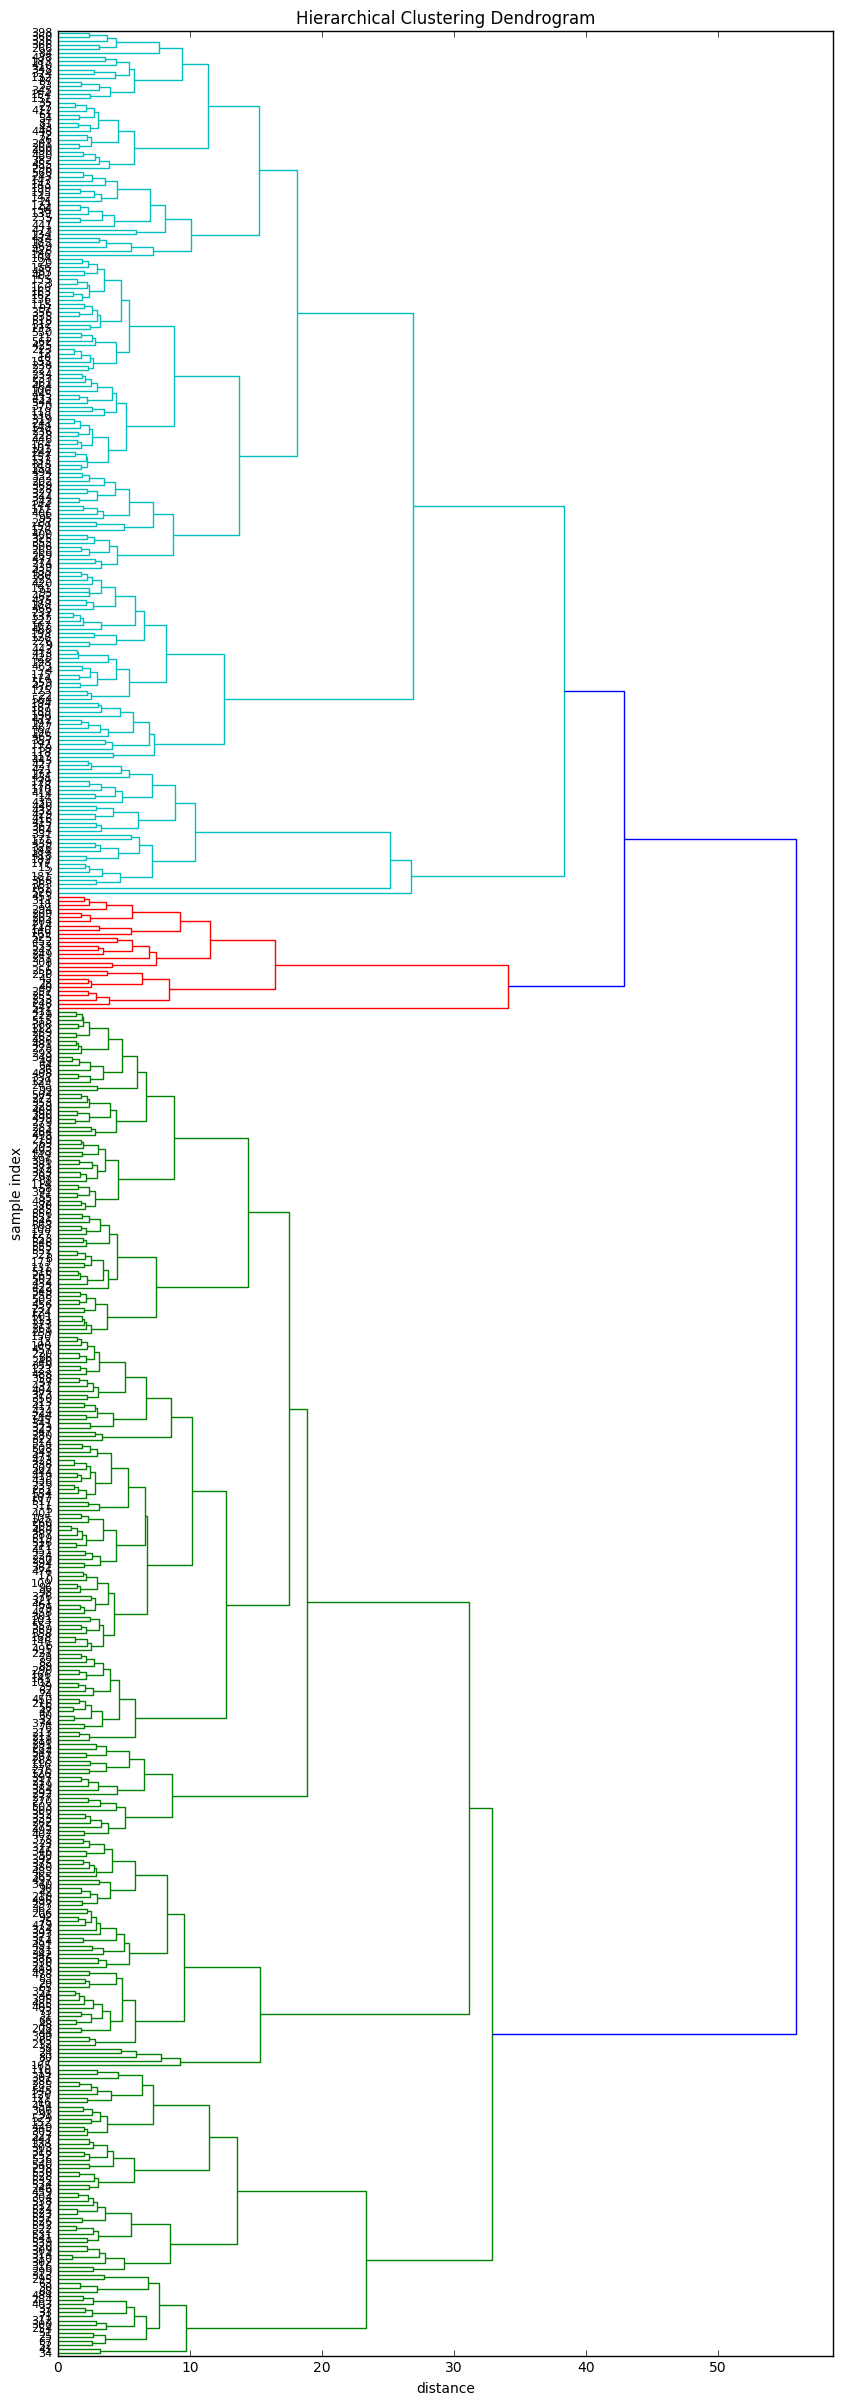

In [32]:
# calculate full dendrogram
plt.figure(figsize=(10, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
#    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


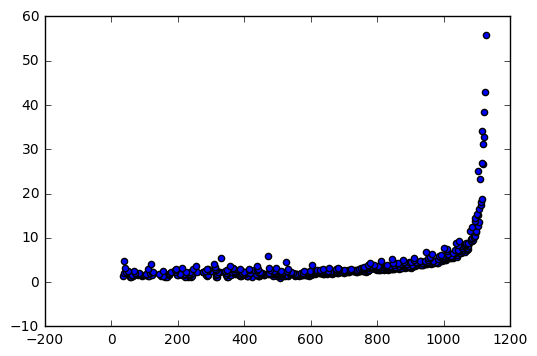

In [33]:
np.shape(Z)
plt.scatter(Z[:,1],Z[:,2])

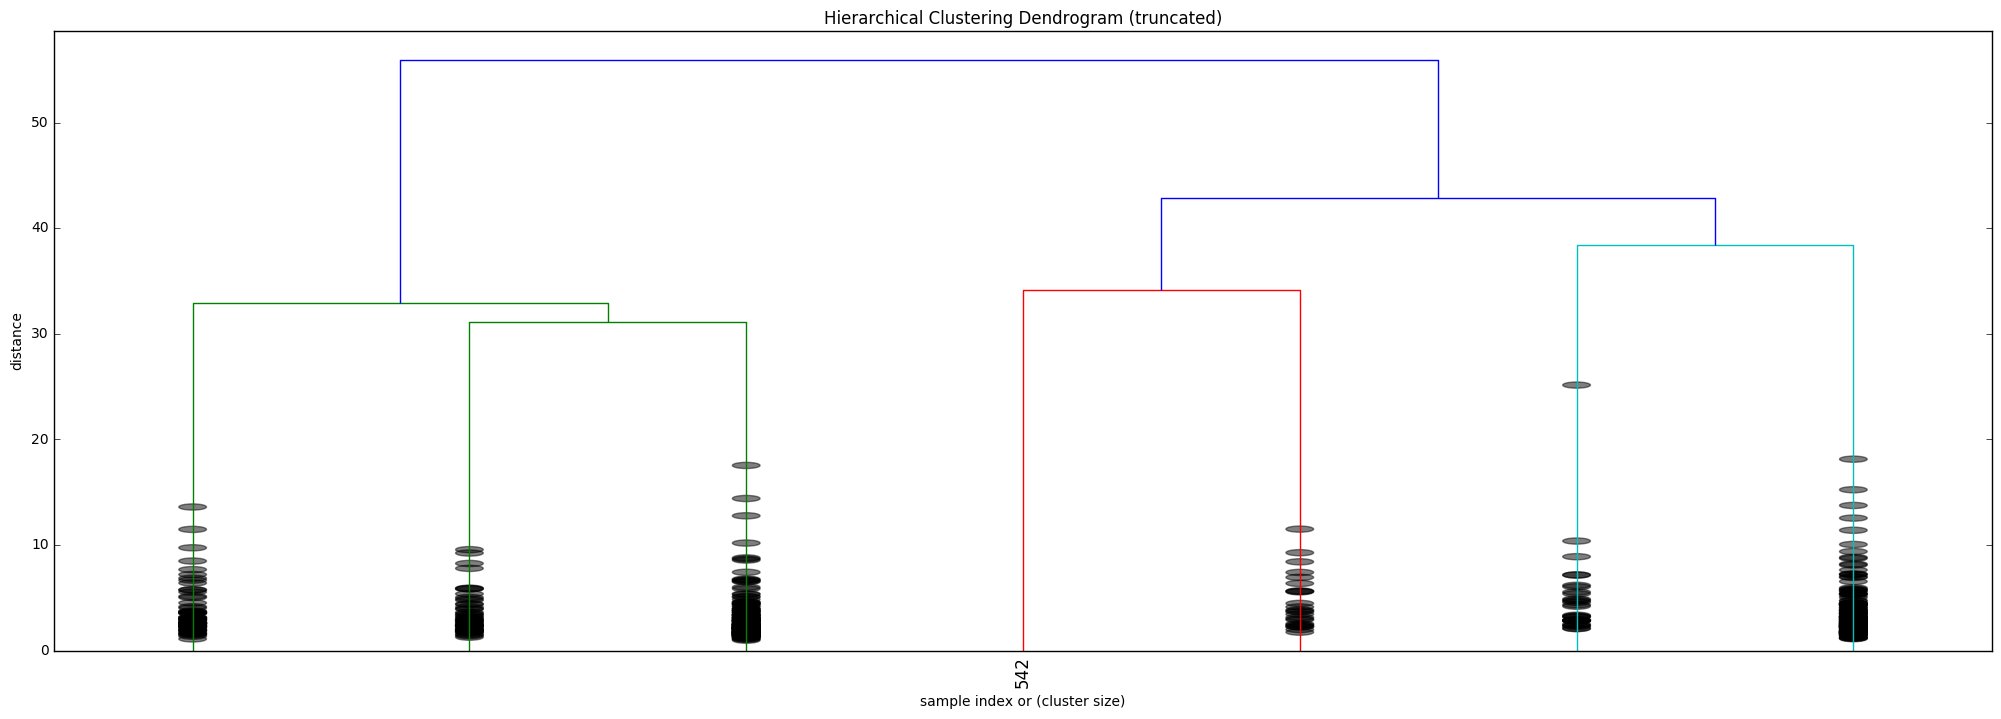

In [40]:
plt.figure(figsize=(25, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=7,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [35]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

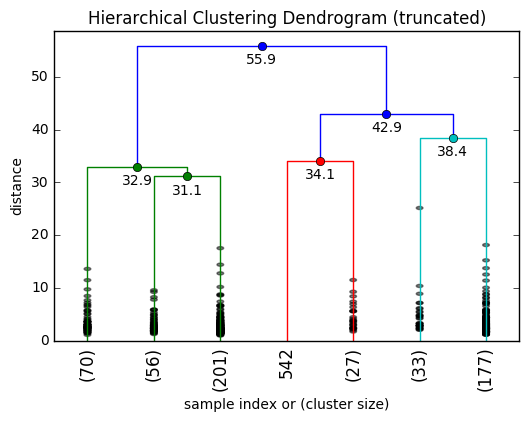

In [41]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=7,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

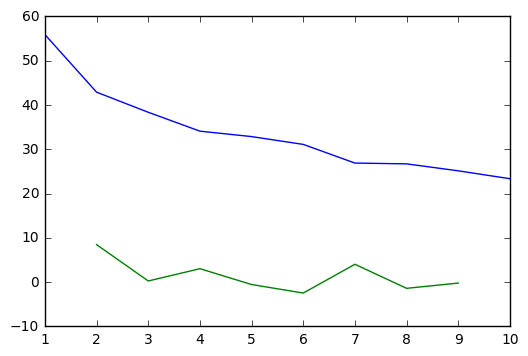

clusters: 2


In [37]:
## Elbow Method

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [39]:
from scipy.cluster.hierarchy import fcluster
max_d = 30
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 4, 6, 7, 7, 3, 3, 7, 3, 7, 7, 7, 7, 3, 6, 6, 1, 3, 4, 1, 7, 7, 7,
       2, 2, 1, 7, 7, 4, 2, 1, 2, 3, 1, 1, 7, 3, 1, 2, 3, 4, 1, 2, 7, 2, 4,
       2, 3, 2, 3, 2, 1, 1, 7, 7, 3, 3, 3, 3, 7, 3, 7, 3, 1, 3, 2, 2, 1, 1,
       3, 3, 1, 7, 2, 3, 2, 3, 2, 3, 3, 2, 7, 3, 2, 7, 2, 3, 7, 3, 3, 2, 1,
       2, 7, 7, 7, 3, 7, 3, 3, 3, 7, 3, 3, 7, 3, 7, 3, 3, 3, 1, 7, 3, 3, 3,
       7, 3, 7, 7, 7, 1, 1, 7, 3, 3, 7, 3, 3, 7, 3, 7, 3, 7, 7, 7, 7, 7, 7,
       1, 7, 4, 3, 7, 7, 7, 3, 3, 7, 7, 3, 3, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       6, 7, 7, 7, 2, 3, 7, 3, 4, 6, 6, 6, 3, 7, 7, 7, 6, 6, 6, 7, 6, 6, 7,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 4, 4, 2,
       3, 2, 4, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 3, 7, 7, 3, 7, 7, 7, 7, 3,
       3, 3, 7, 7, 7, 7, 7, 3, 7, 3, 3, 7, 7, 7, 3, 3, 1, 4, 4, 4, 4, 4, 1,
       4, 1, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 7, 7, 3, 3, 3, 3, 7, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 7, 3, 3, 3, 3, 3, 3, 4, 1, 7, 2, 1,
       1, 1,

In [26]:
from collections import defaultdict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters):
    cluster_dict[c].append(i)
#print(cluster_dict)
cluster_dict

defaultdict(list,
            {1: [9,
              23,
              24,
              29,
              30,
              31,
              36,
              38,
              42,
              44,
              46,
              48,
              49,
              50,
              55,
              58,
              63,
              64,
              65,
              66,
              68,
              70,
              73,
              75,
              77,
              80,
              83,
              85,
              88,
              90,
              91,
              92,
              99,
              112,
              114,
              116,
              126,
              129,
              149,
              165,
              206,
              207,
              208,
              210,
              211,
              212,
              213,
              215,
              217,
              218,
              226,
              229,
              245,
      

In [24]:
for i in range(len(cluster_dict[1])):
    print(f.iloc[cluster_dict[3][i],0])

Atlantic City city
Buena borough
Egg Harbor City city
Pleasantville city
Ventnor City city
Bergenfield borough
Bogota borough
Cliffside Park borough
Dumont borough
East Rutherford borough
Edgewater borough
Englewood city
Fair Lawn borough
Fairview borough
Fort Lee borough
Garfield city
Hackensack city
Hasbrouck Heights borough
Leonia borough
Little Ferry borough
Lodi borough
Maywood borough
New Milford borough
Northvale borough
Palisades Park borough
Ridgefield borough
Ridgefield Park village
River Edge borough
Rochelle Park township
Rutherford borough
South Hackensack township
Teaneck township
Wallington borough
Westwood borough
Beverly city
Bordentown city
Burlington city
Delran township
Maple Shade township
Palmyra borough
Riverside township
Wrightstown borough
Audubon borough
Barrington borough
Bellmawr borough
Berlin township
Brooklawn borough
Camden city
Cherry Hill township
Chesilhurst borough
Clementon borough
Collingswood borough
Gloucester City city
Hi-Nella borough
Lindenwol

In [43]:
df_to_d3 = f.loc[:,'FIPS':'city_town'] 
df_to_d3['cluster'] = clusters
df_to_d3.columns = ['id','name','cluster']
#cluster_labels]])
df_to_d3.head()
df_to_d3.to_csv('clusters7.tsv',sep = '\t', index = False)

In [1]:
f.info()

NameError: name 'f' is not defined